In [1]:
from utils import plot_imgs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pipeline
from sklearn.model_selection import train_test_split
from utils import plot_segm_history
from unet import unet_model2
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD
from metrics import iou, iou_thresholded
from losses import jaccard_distance
from keras.metrics import mean_absolute_error, mean_squared_error

In [2]:
# création de notre dataset
dataset = pipeline.Pipeline(file='CDStent.raw').dataset
x = []
y = []
for noised_images, labels in dataset:
    x.append(noised_images.numpy())
    y.append(labels.numpy())
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

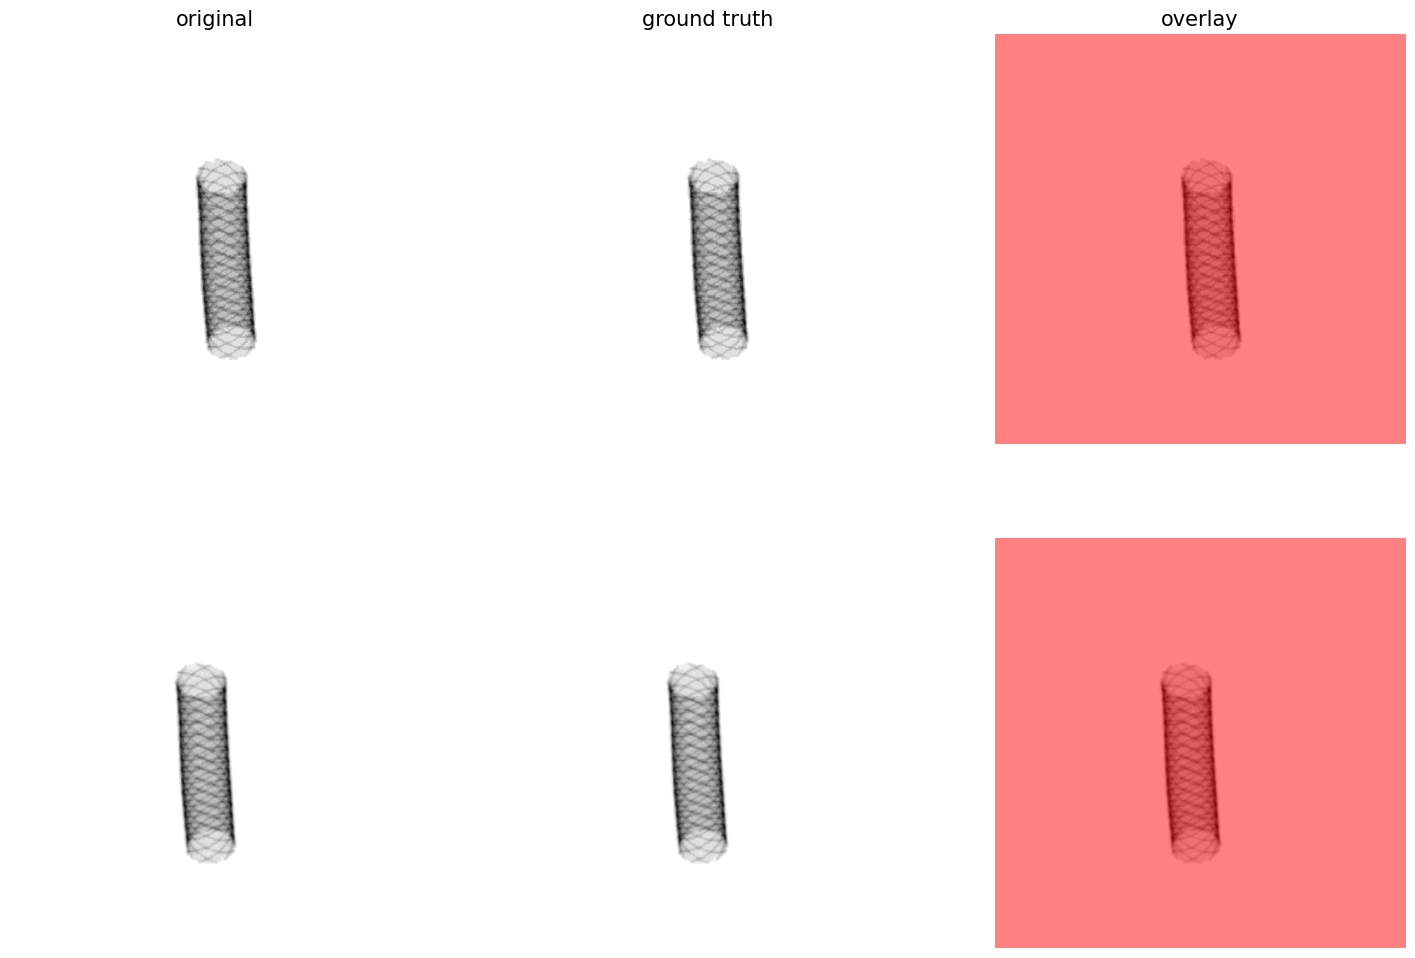

In [3]:
plot_imgs(org_imgs=x[10:], mask_imgs=y[10:], nm_img_to_plot=2, figsize=6)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [5]:
# model_filename = "Result_models\model_v11.h5"
input_shape = x_train[0].shape
model = unet_model2(input_shape=input_shape)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="mse",
    metrics=[mean_squared_error, mean_absolute_error]
)

In [6]:
model.load_weights("best_model_weights.h5")

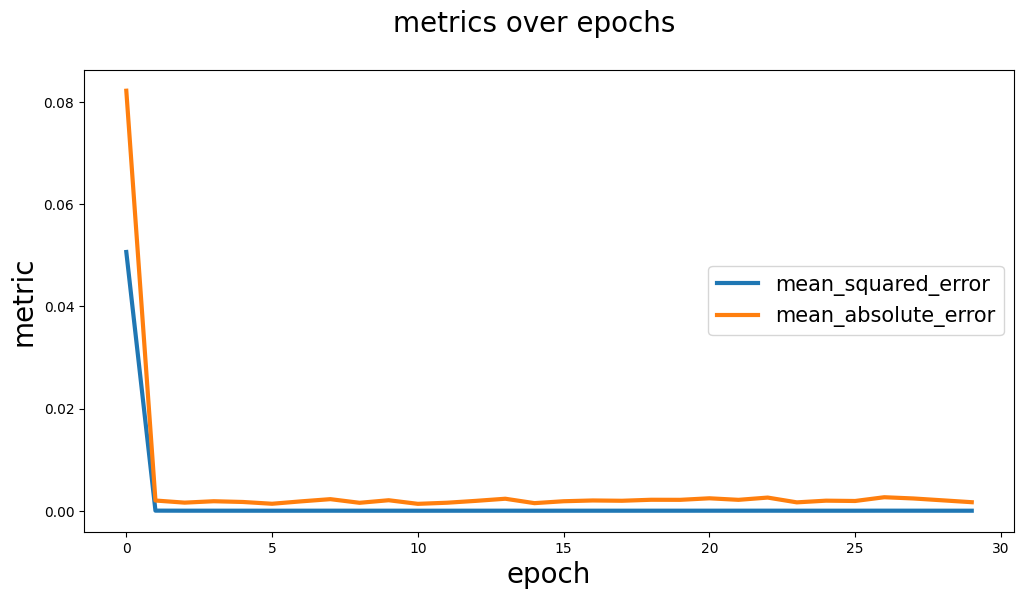

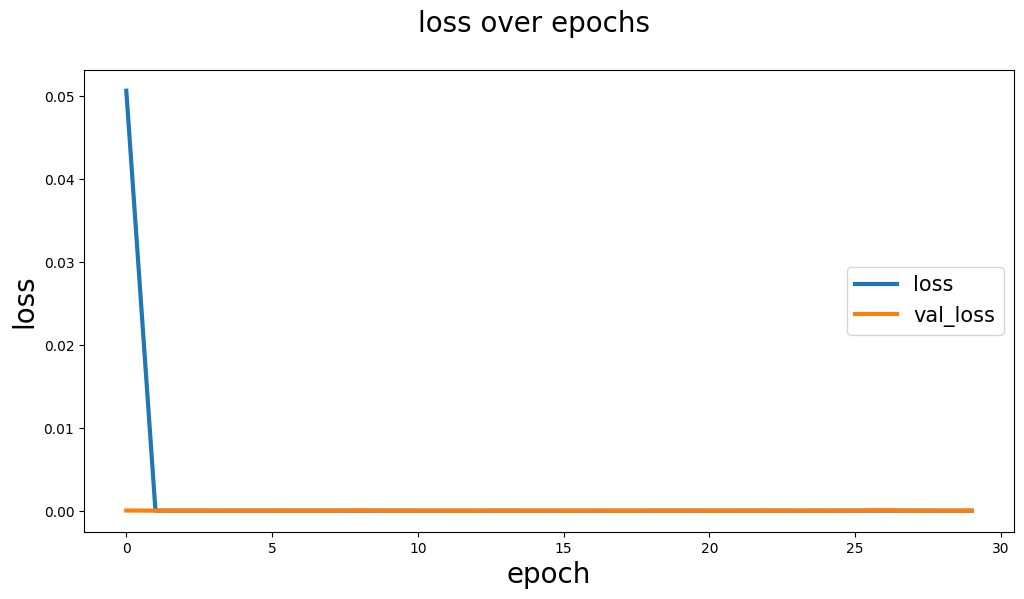

In [7]:
import pickle
with open("best_model_history.pickle", 'rb') as history_file:
    history = pickle.load(history_file)
plot_segm_history(history)
# history


In [9]:
denoised_imgs = []
for i in range(len(x_val)):
    denoised_image = model.predict(np.expand_dims(x_val[i], axis=0))[0]

    # Post-traitement de l'image débruitée
    denoised_image = denoised_image * 255.
    denoised_image = np.clip(denoised_image, 0, 255)
    denoised_image = denoised_image.astype(np.uint8)

    denoised_imgs.append(denoised_image)

1/1 [==============================] - 1s 601ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

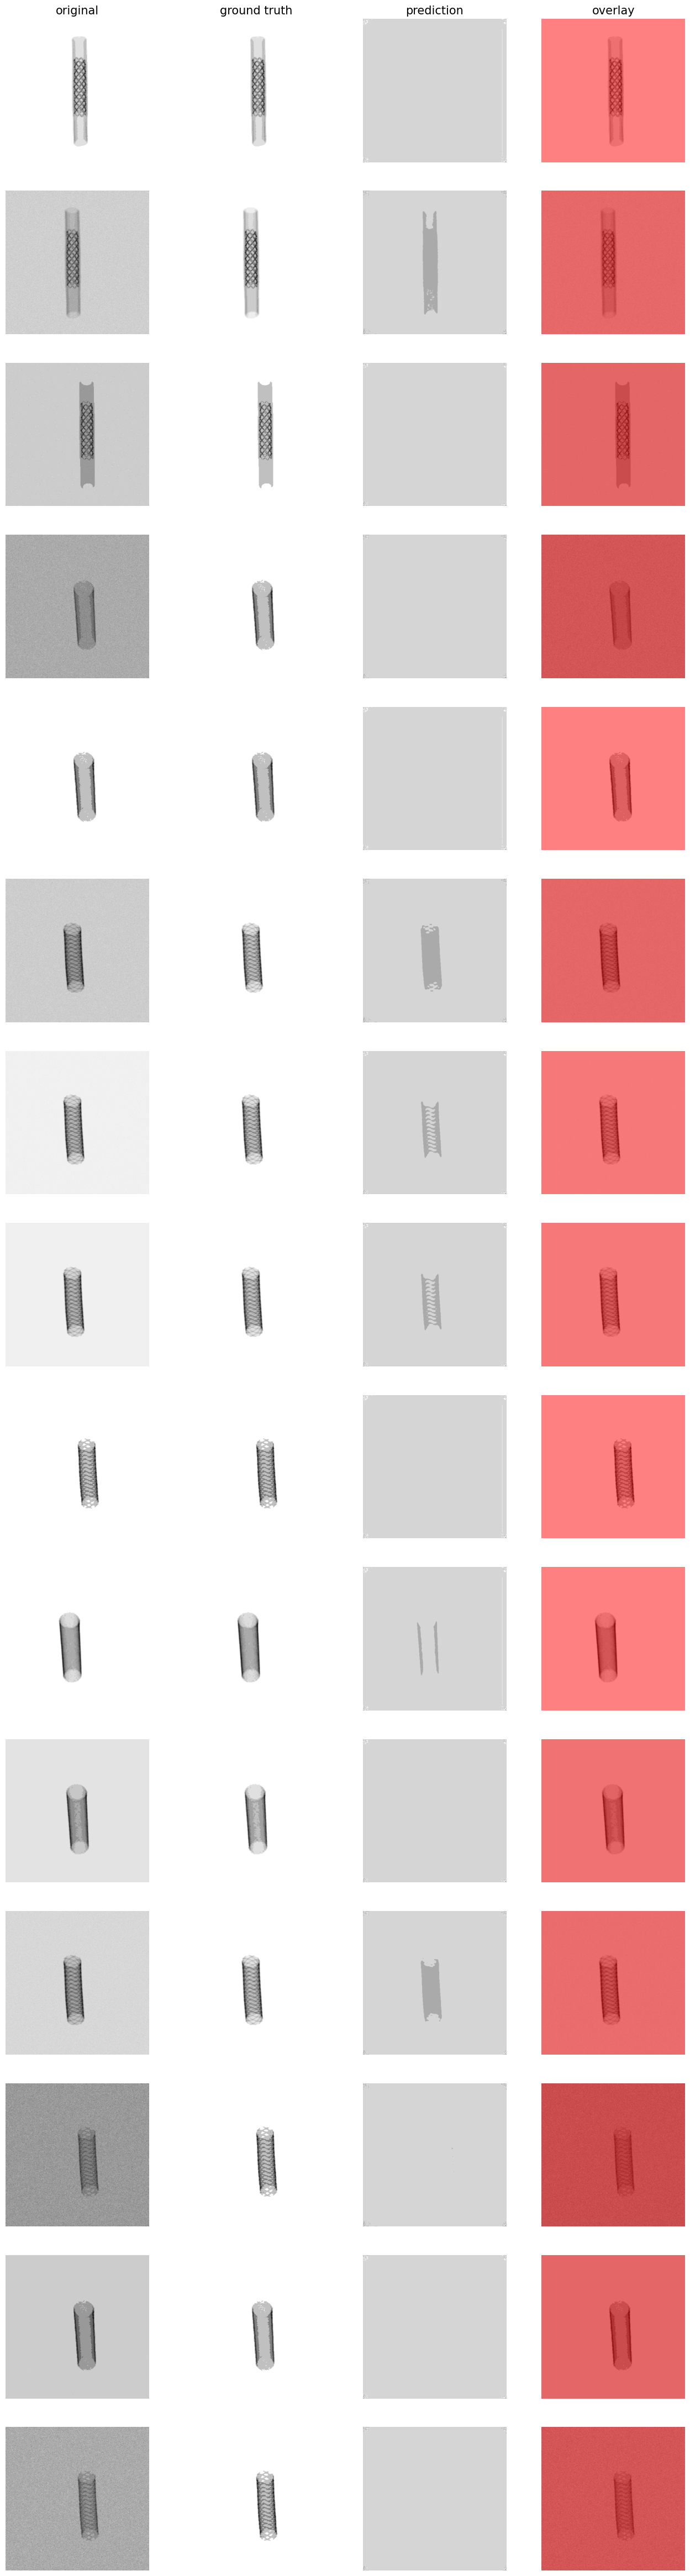

In [10]:
plot_imgs(org_imgs=x_val, mask_imgs=y_val,pred_imgs=np.array(denoised_imgs), nm_img_to_plot=15)
